In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# # generate random data-set
# np.random.seed(0)
# x = np.random.rand(100, 1)
# y = 2 + 3 * x + np.random.rand(100, 1)

# # plot
# plt.scatter(x,y,s=50)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

In [10]:
import pandas as pd
from pandas import *
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
%matplotlib inline
import warnings
import itertools
import statsmodels.api as sm

In [2]:
test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_15_april_10000_1.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M:%S')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new.head()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,stringTime,correct_longtime
0,Row0,1555311120000,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,...,44.620461,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,2019-04-15 08:52:00,1555311120
1,Row1,1555311060000,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,...,53.182296,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,2019-04-15 08:51:00,1555311060
2,Row2,1555311000000,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,...,53.029243,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,2019-04-15 08:50:00,1555311000
3,Row3,1555310940000,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,...,53.015226,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,2019-04-15 08:49:00,1555310940
4,Row4,1555310880000,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,...,53.172932,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,2019-04-15 08:48:00,1555310880


In [5]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M:%S')

In [6]:
test_new.tail()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,stringTime,correct_longtime,dateTime
9995,Row9995,1554108300000,58.362168,56.975260,92.310264,62.480495,73.991930,67.336628,92.456423,65.331201,...,20.542020,81.609849,75.180355,64.262689,73.173176,0.403325,10.162761,2019-04-01 10:45:00,1554108300,2019-04-01 10:45:00
9996,Row9996,1554108240000,58.362168,50.399797,92.515957,52.197429,73.524367,67.186786,92.273478,56.047147,...,19.733544,81.556136,74.915585,64.439224,73.545164,0.403811,10.613002,2019-04-01 10:44:00,1554108240,2019-04-01 10:44:00
9997,Row9997,1554108180000,58.823529,49.537076,92.701468,54.126174,73.056803,67.306207,92.598797,57.187621,...,19.836008,81.637211,74.997776,64.420902,73.387147,0.392325,10.622049,2019-04-01 10:43:00,1554108180,2019-04-01 10:43:00
9998,Row9998,1554108120000,58.823529,46.087484,92.701468,47.816162,72.589240,67.306207,92.598797,49.676277,...,20.600433,81.726611,74.912559,64.905961,75.226676,0.392267,9.193231,2019-04-01 10:42:00,1554108120,2019-04-01 10:42:00
9999,Row9999,1554108060000,58.823529,48.141182,92.701468,50.326961,72.121676,67.321417,92.598797,52.898292,...,21.992768,81.808420,75.397170,65.591365,74.039625,0.391887,10.829791,2019-04-01 10:41:00,1554108060,2019-04-01 10:41:00


In [7]:
my_data=test_new.loc[200:,['dateTime','AEDAHO_T9_V2']]
my_data.head()

,dateTime,AEDAHO_T9_V2
200,2019-04-11 16:54:00,42.040317
201,2019-04-11 16:53:00,42.105153
202,2019-04-11 16:52:00,42.097709
203,2019-04-11 16:51:00,42.127110
204,2019-04-11 16:50:00,42.001027


In [8]:
my_data_1 = my_data.set_index('dateTime')
my_data_1.head()

,AEDAHO_T9_V2
dateTime,
2019-04-11 16:54:00,42.040317
2019-04-11 16:53:00,42.105153
2019-04-11 16:52:00,42.097709
2019-04-11 16:51:00,42.127110
2019-04-11 16:50:00,42.001027


In [17]:
my_data_1.to_csv("file_name.csv")

In [29]:
new=pd.read_csv('file_name.csv', header=0)

In [30]:
new.head()

,dateTime,AEDAHO_T9_V2
0,2019-04-11 16:54:00,42.040317
1,2019-04-11 16:53:00,42.105153
2,2019-04-11 16:52:00,42.097709
3,2019-04-11 16:51:00,42.127110
4,2019-04-11 16:50:00,42.001027


In [31]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

C:\Users\atif\Anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Test MSE: 38.985


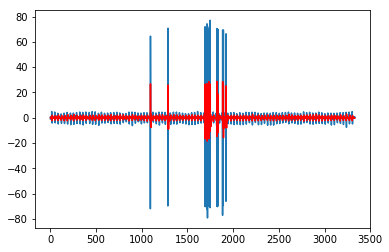

In [32]:
series = Series.from_csv('file_name.csv', header=0)
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [33]:
# fit an AR model and save the whole model to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = Series.from_csv('file_name.csv', header=0)
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

C:\Users\atif\Anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [34]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 0.00766034 -0.51553355 -0.35854506 -0.30090791 -0.18788507 -0.17032713
 -0.10406681]
[71.07934514]


In [35]:
# fit an AR model and manually save coefficients to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = Series.from_csv('file_name.csv', header=0)
X = difference(series.values)
# fit model
window_size = 6
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

C:\Users\atif\Anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [36]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

[ 0.00766034 -0.51553355 -0.35854506 -0.30090791 -0.18788507 -0.17032713
 -0.10406681]
[ 0.3463975   0.85598276 -0.1440523   0.29529939  0.41649884  0.37285019]
[71.07934514]


In [37]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 70.501817


In [38]:
# load a coefficients and from file and make a manual prediction
import numpy
 
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
# load model
coef = numpy.load('man_model.npy')
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
# make prediction
prediction = predict(coef, lag)
# transform prediction
yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 70.501817


In [39]:
# update the data for the AR model with a new obs
import numpy
# get real observation
observation = 48
# load the saved data
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ar_data.npy', data)
# update and save real observation
last_ob[0] = observation
numpy.save('ar_obs.npy', last_ob)

In [40]:
# update the data for the manual model with a new obs
import numpy
# get real observation
observation = 48
# update and save differenced observation
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
diffed = observation - last_ob[0]
lag = numpy.append(lag[1:], [diffed], axis=0)
numpy.save('man_data.npy', lag)
# update and save real observation
last_ob[0] = observation
numpy.save('man_obs.npy', last_ob)

In [41]:
coef

array([ 0.00766034, -0.51553355, -0.35854506, -0.30090791, -0.18788507,
       -0.17032713, -0.10406681])

In [ ]:
y = my_data_1['AEDAHO_T9_V2']

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()